**STEP1 --> Importing the necessary libraries**

In [525]:
import requests
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pycountry
import pycountry

**STEP2 --> Collecting and Loading Obesity and Malnutrition Data From WHO URL**

Totally we are collecting using 4 urls 

1.Obesity in Adult

2.Obesity in Children

3.Malnutrition in Adult

4.Malnutrition in Children

In [3]:
### Collecting Data for obesity in adult ###
url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
result = requests.get(url)
obesity_adult = result.json()

In [4]:
print(obesity_adult.keys())

dict_keys(['@odata.context', 'value'])


In [5]:
df_obs_adult = pd.DataFrame(obesity_adult['value'])


In [1141]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30) 
pd.set_option('display.max_rows',2000)

In [1139]:
### Collecting data for obesity in children ###

url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
result = requests.get(url)
obesity_child = result.json()
df_obs_child = pd.DataFrame(obesity_child['value'])
#print(df_obs_child)



            Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  ... Comments                           Date TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd
0      2857946  NCD_BMI_PLUS2C        COUNTRY        JAM                AMR  ...     None  2024-02-29T16:06:41.017+01:00               2013  2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00
1      2858470  NCD_BMI_PLUS2C        COUNTRY        NZL                WPR  ...     None  2024-02-29T16:06:41.017+01:00               1990  1990-01-01T00:00:00+01:00  1990-12-31T00:00:00+01:00
2      2858648  NCD_BMI_PLUS2C        COUNTRY        MYS                WPR  ...     None  2024-02-29T16:06:41.017+01:00               2007  2007-01-01T00:00:00+01:00  2007-12-31T00:00:00+01:00
3      2858693  NCD_BMI_PLUS2C        COUNTRY        GRL                EUR  ...     None  2024-02-29T16:06:41.017+01:00               1996  1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00
4      2858871  NCD_BMI_PLUS2C

In [7]:
##### Getting data for Malnutrition in Adult ####

url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
result = requests.get(url)
mal_adult = result.json()
df_mal_adult = pd.DataFrame(mal_adult['value'])

In [8]:
##### Getting data for Malnutrition in children ####

url = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
result = requests.get(url)
mal_child = result.json()
df_mal_child = pd.DataFrame(mal_child['value'])

**STEP 3 --> Data Cleaning and Feature Engineering**

New Column AgeGroup is added to the 4 DataFrames

Obesity data of children and adult are combined into df_obesity

Malnutrition data of children and adult are combined into df_malnutrition

In [9]:
### Adding new columns to each data frame ###

df_obs_adult['AgeGroup']='ADULT'
df_obs_child['AgeGroup']='CHILD'
df_mal_adult['AgeGroup']='ADULT'
df_mal_child['AgeGroup']='CHILD'

In [28]:
### Combining adult and children dataframes into one ###

df_obesity = pd.concat([df_obs_adult,df_obs_child],ignore_index=True)

In [32]:
### Combining adult and children Malnutrition DataFrames into one ###

df_malnutrition=pd.concat([df_mal_adult,df_mal_child],ignore_index=True)

**Data is filtered for Years bettwen 2012 to 2022**

In [34]:
##### Filtering the dataset to get records between the year 2012 and 2022 #####

df_obesity_sub = df_obesity[(df_obesity['TimeDimensionValue'] >='2012') & (df_obesity['TimeDimensionValue'] <= '2022')]
df_malnutrition_sub = df_malnutrition[(df_malnutrition['TimeDimensionValue'] >='2012') & (df_malnutrition['TimeDimensionValue'] <= '2022')]

In [36]:
##### Dropping the unnecessary columns ####

df_obesity_1 = df_obesity_sub.drop(columns=['Id', 'IndicatorCode','SpatialDimType','ParentLocationCode','TimeDimType','Dim1Type','Dim2Type',
                             'Dim2','Dim3Type', 'Dim3','DataSourceDimType', 'DataSourceDim', 'Value','Comments', 'Date', 'TimeDimensionValue', 
                             'TimeDimensionBegin','TimeDimensionEnd'])

In [38]:
df_obesity_1.shape

(27720, 8)

In [40]:
df_malnutrition_1 = df_malnutrition_sub.drop(columns=['Id', 'IndicatorCode','SpatialDimType','ParentLocationCode','TimeDimType','Dim1Type','Dim2Type',
                             'Dim2','Dim3Type', 'Dim3','DataSourceDimType', 'DataSourceDim', 'Value','Comments', 'Date', 'TimeDimensionValue', 
                             'TimeDimensionBegin','TimeDimensionEnd'])

In [42]:
### Renaming the column names ###

df_obesity_1.columns=['Country','Region','Year','Gender','Mean_Estimate','LowerBound','UpperBound','AgeGroup']

In [44]:
df_malnutrition_1.columns=['Country','Region','Year','Gender','Mean_Estimate','LowerBound','UpperBound','AgeGroup'] 

In [46]:
#### Replacing the values in Gender column for better readability ###

df_obesity_1['Gender'].replace({'SEX_MLE':'MALE','SEX_FMLE':'FEMALE','SEX_BTSX':'BOTH'})


0          MALE
2          MALE
9          MALE
15       FEMALE
17       FEMALE
          ...  
83137      BOTH
83140    FEMALE
83148      MALE
83151      MALE
83154      MALE
Name: Gender, Length: 27720, dtype: object

In [116]:
### Copying details to the final data frame df_obesity ###

df_obesity=df_obesity_sub.drop(columns=['Id', 'IndicatorCode','SpatialDimType','ParentLocationCode','TimeDimType','Dim1Type','Dim2Type',
                             'Dim2','Dim3Type', 'Dim3','DataSourceDimType', 'DataSourceDim', 'Value','Comments', 'Date', 'TimeDimensionValue', 
                             'TimeDimensionBegin','TimeDimensionEnd'])

In [118]:
df_obesity.shape

(27720, 8)

In [120]:
df_obesity.columns    

Index(['SpatialDim', 'ParentLocation', 'TimeDim', 'Dim1', 'NumericValue',
       'Low', 'High', 'AgeGroup'],
      dtype='object')

In [122]:
df_obesity.columns=['Country','Region','Year','Gender','Mean_Estimate','LowerBound','UpperBound','AgeGroup']

**Replacing values in Gender column for better readability**

In [124]:
df_obesity['Gender']=df_obesity['Gender'].replace({'SEX_MLE':'MALE','SEX_FMLE':'FEMALE','SEX_BTSX':'BOTH'})
df_obesity.head(5)
df_obesity.shape

(27720, 8)

In [126]:
df_malnutrition_1.shape

(27720, 8)

In [66]:
### Keeping the final dataframes as df_obesity and df_malnutrition ###

df_malnutrition=df_malnutrition_1

In [68]:
df_malnutrition['Gender']=df_malnutrition['Gender'].replace({'SEX_MLE':'MALE','SEX_FMLE':'FEMALE','SEX_BTSX':'BOTH'})

**Country codes are converted to country names using the function get_country_name**

**Country details are fetched from pycountry library**

In [149]:

def get_country_name(countryCode):
    ### Check if the country name is avaiable in pycountry ###
    countryName = pycountry.countries.get(alpha_3=countryCode)
    if countryName:
        return countryName.name
    else:
    ### Get it from special cases ###
        return special_cases.get(countryCode)

special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}

In [171]:
df_obesity['Country']= df_obesity['Country'].apply(get_country_name)

In [ ]:
df_obesity.shape

In [76]:
df_malnutrition.shape

(27720, 8)

In [173]:
df_obesity.head()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup
0,Bahamas,Americas,2017,MALE,36.82630,32.93017,40.91354,ADULT
2,"Iran, Islamic Republic of",Eastern Mediterranean,2020,MALE,17.48764,15.79378,19.24573,ADULT
9,Iraq,Eastern Mediterranean,2020,MALE,28.33553,23.08959,33.81534,ADULT
15,Greenland,Europe,2014,FEMALE,27.94870,24.92477,31.21326,ADULT
17,Armenia,Europe,2019,FEMALE,31.89322,28.16068,35.57493,ADULT


In [157]:
df_obesity_copy=df_obesity.copy()

In [175]:
df_obesity.shape

(27720, 8)

In [177]:
df_obesity.tail()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup
83137,Tajikistan,Europe,2020,BOTH,1.47593,0.96418,2.19743,CHILD
83140,Somalia,Eastern Mediterranean,2012,FEMALE,1.96619,0.30204,5.87241,CHILD
83148,Vanuatu,Western Pacific,2021,MALE,16.63489,3.32590,34.87782,CHILD
83151,Madagascar,Africa,2014,MALE,2.03219,0.23648,6.34118,CHILD
83154,Finland,Europe,2017,MALE,11.39063,10.08785,12.76015,CHILD


In [179]:
df_malnutrition_copy=df_malnutrition.copy()
df_malnutrition['Country']= df_malnutrition['Country'].apply(get_country_name)

In [183]:
df_malnutrition.head()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup
0,Argentina,Americas,2013,MALE,1.36614,0.94316,1.89881,ADULT
1,Gabon,Africa,2021,FEMALE,5.79511,3.97204,8.07702,ADULT
5,Mongolia,Western Pacific,2017,BOTH,3.09065,2.42823,3.84215,ADULT
6,Sierra Leone,Africa,2016,FEMALE,8.37172,6.65567,10.25312,ADULT
8,South-East Asia Region,None,2021,BOTH,13.33635,12.24232,14.44287,ADULT


**CI Width is calculated from Upper bound and Lower bound values**

In [185]:
df_obesity['CI_Width']=df_obesity['UpperBound']-df_obesity['LowerBound']

In [187]:
df_obesity.head()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup,CI_Width
0,Bahamas,Americas,2017,MALE,36.82630,32.93017,40.91354,ADULT,7.98337
2,"Iran, Islamic Republic of",Eastern Mediterranean,2020,MALE,17.48764,15.79378,19.24573,ADULT,3.45195
9,Iraq,Eastern Mediterranean,2020,MALE,28.33553,23.08959,33.81534,ADULT,10.72575
15,Greenland,Europe,2014,FEMALE,27.94870,24.92477,31.21326,ADULT,6.28849
17,Armenia,Europe,2019,FEMALE,31.89322,28.16068,35.57493,ADULT,7.41425


In [189]:
df_malnutrition['CI_Width']=df_malnutrition['UpperBound']-df_malnutrition['LowerBound']

In [191]:
df_malnutrition.head()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup,CI_Width
0,Argentina,Americas,2013,MALE,1.36614,0.94316,1.89881,ADULT,0.95565
1,Gabon,Africa,2021,FEMALE,5.79511,3.97204,8.07702,ADULT,4.10498
5,Mongolia,Western Pacific,2017,BOTH,3.09065,2.42823,3.84215,ADULT,1.41392
6,Sierra Leone,Africa,2016,FEMALE,8.37172,6.65567,10.25312,ADULT,3.59745
8,South-East Asia Region,None,2021,BOTH,13.33635,12.24232,14.44287,ADULT,2.20055


**Function is used for calculating obesity level based on Mean Estimate value**

In [376]:
def get_obesity_level(value):
    if(value >=30):
        return 'High'
    elif value >=25 and value <=29.99999:
        return 'Moderate'
    elif(value < 25):
        return 'Low'

In [378]:
val=get_obesity_level(29.99062)

In [380]:
print (val)

Moderate


In [382]:
df_obesity['obesity_level']=df_obesity['Mean_Estimate'].apply(get_obesity_level)

In [219]:
df_obesity.head()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup,CI_Width,obesity_level
0,Bahamas,Americas,2017,MALE,36.82630,32.93017,40.91354,ADULT,7.98337,High
2,"Iran, Islamic Republic of",Eastern Mediterranean,2020,MALE,17.48764,15.79378,19.24573,ADULT,3.45195,Low
9,Iraq,Eastern Mediterranean,2020,MALE,28.33553,23.08959,33.81534,ADULT,10.72575,Moderate
15,Greenland,Europe,2014,FEMALE,27.94870,24.92477,31.21326,ADULT,6.28849,Moderate
17,Armenia,Europe,2019,FEMALE,31.89322,28.16068,35.57493,ADULT,7.41425,High


In [221]:
df_obesity.tail()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup,CI_Width,obesity_level
83137,Tajikistan,Europe,2020,BOTH,1.47593,0.96418,2.19743,CHILD,1.23325,Low
83140,Somalia,Eastern Mediterranean,2012,FEMALE,1.96619,0.30204,5.87241,CHILD,5.57037,Low
83148,Vanuatu,Western Pacific,2021,MALE,16.63489,3.32590,34.87782,CHILD,31.55192,Low
83151,Madagascar,Africa,2014,MALE,2.03219,0.23648,6.34118,CHILD,6.10470,Low
83154,Finland,Europe,2017,MALE,11.39063,10.08785,12.76015,CHILD,2.67230,Low


In [227]:
df_obs_child.tail(5)

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
62365,9763953,NCD_BMI_PLUS2C,COUNTRY,BEL,YEAR,EUR,Europe,SEX,SEX_BTSX,1997,...,None,5.1 [3.4-7.0],5.05149,3.43740,7.00625,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
62366,9764186,NCD_BMI_PLUS2C,COUNTRY,SDN,YEAR,EMR,Eastern Mediterranean,SEX,SEX_BTSX,2006,...,None,1.7 [0.7-3.4],1.71509,0.69364,3.38516,None,2024-02-29T16:06:41.017+01:00,2006,2006-01-01T00:00:00+01:00,2006-12-31T00:00:00+01:00
62367,9764519,NCD_BMI_PLUS2C,COUNTRY,CPV,YEAR,AFR,Africa,SEX,SEX_BTSX,2000,...,None,1.8 [0.4-5.0],1.84242,0.35935,5.00420,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00
62368,9764553,NCD_BMI_PLUS2C,COUNTRY,STP,YEAR,AFR,Africa,SEX,SEX_MLE,2005,...,None,4.7 [0.9-12.3],4.68102,0.92881,12.27006,None,2024-02-29T16:06:41.017+01:00,2005,2005-01-01T00:00:00+01:00,2005-12-31T00:00:00+01:00
62369,9764785,NCD_BMI_PLUS2C,COUNTRY,BGD,YEAR,SEAR,South-East Asia,SEX,SEX_MLE,2006,...,None,0.8 [0.1-2.2],0.76168,0.14542,2.18712,None,2024-02-29T16:06:41.017+01:00,2006,2006-01-01T00:00:00+01:00,2006-12-31T00:00:00+01:00


In [239]:
df_obs_child['NumericValue'].max()

44.29659

**Function is used for calculating Malnutrition level based on Mean Estimate value**

In [463]:
def get_malnutrition_level(value):
    if(value >=20):
        return 'High'
    elif value >=10 and value <=19.99999:
        return 'Moderate'
    elif(value < 10):
        return 'Low'

In [465]:
df_malnutrition['malnutrition_level']=df_malnutrition['Mean_Estimate'].apply(get_malnutrition_level)

In [245]:
df_malnutrition.head()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup,CI_Width,malnutrition_level
0,Argentina,Americas,2013,MALE,1.36614,0.94316,1.89881,ADULT,0.95565,Low
1,Gabon,Africa,2021,FEMALE,5.79511,3.97204,8.07702,ADULT,4.10498,Low
5,Mongolia,Western Pacific,2017,BOTH,3.09065,2.42823,3.84215,ADULT,1.41392,Low
6,Sierra Leone,Africa,2016,FEMALE,8.37172,6.65567,10.25312,ADULT,3.59745,Low
8,South-East Asia Region,None,2021,BOTH,13.33635,12.24232,14.44287,ADULT,2.20055,Moderate


In [247]:
df_malnutrition.tail()

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,AgeGroup,CI_Width,malnutrition_level
83147,Haiti,Americas,2013,FEMALE,4.14069,2.79550,5.71434,CHILD,2.91884,Low
83149,Tajikistan,Europe,2018,BOTH,7.57499,5.42817,10.21840,CHILD,4.79023,Low
83150,Papua New Guinea,Western Pacific,2016,BOTH,1.70365,0.62172,3.50706,CHILD,2.88534,Low
83156,Samoa,Western Pacific,2020,FEMALE,0.73407,0.06415,2.81018,CHILD,2.74603,Low
83159,Iceland,Europe,2018,MALE,2.54279,0.46517,7.30748,CHILD,6.84231,Low


**Rearranging the columns for better readability**

In [249]:
#### Rearranging the columns ###

df_obesity=df_obesity[['Year','Gender','Mean_Estimate','LowerBound','UpperBound','AgeGroup','Country','Region','CI_Width','obesity_level']]

In [253]:
df_malnutrition=df_malnutrition[['Year','Gender','Mean_Estimate','LowerBound','UpperBound','AgeGroup','Country','Region','CI_Width','malnutrition_level']]

**STEP3 --> Exploratory Data Analysis**

In [326]:
##### Understanding dataset and EDA ######

df_obesity.shape
df_malnutrition.shape
df_obesity.columns
df_obesity.dtypes
df_malnutrition.dtypes
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 0 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           27720 non-null  int64  
 1   Gender         27720 non-null  object 
 2   Mean_Estimate  27720 non-null  float64
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   AgeGroup       27720 non-null  object 
 6   Country        27720 non-null  object 
 7   Region         26268 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27690 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


**Columns with null values are analysed**

In [388]:
df_obesity.describe()

df_obesity['obesity_level'].unique()
df_obesity.isnull().sum()

Year                0
Gender              0
Mean_Estimate       0
LowerBound          0
UpperBound          0
AgeGroup            0
Country             0
Region           1452
CI_Width            0
obesity_level       0
dtype: int64

In [1]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 11) 
pd.set_option('display.max_rows',2000)
rows_with_null = df_obesity[df_obesity['Region'].isnull()]
#print(rows_with_null)

NameError: name 'pd' is not defined

In [415]:
df_obesity_bfr_fillna = df_obesity.copy()

In [445]:
#### Filling the null values in Region column with values from Country column #####

df_obesity['Region'] = df_obesity['Region'].fillna(df_obesity['Country'])
df_obesity.isnull().sum()
pd.set_option('display.max_rows',30000)

df_obesity[['Region', 'Country']]
show=df_obesity[df_obesity['Region']==df_obesity['Country']]
show.count()

Year             1452
Gender           1452
Mean_Estimate    1452
LowerBound       1452
UpperBound       1452
AgeGroup         1452
Country          1452
Region           1452
CI_Width         1452
obesity_level    1452
dtype: int64

In [469]:
df_malnutrition.isnull().sum()
rows_with_null = df_malnutrition[df_malnutrition['malnutrition_level'].isnull()]
print(rows_with_null)
df_malnutrition.isnull().sum()

Empty DataFrame
Columns: [Year, Gender, Mean_Estimate, LowerBound, UpperBound, AgeGroup, Country, Region, CI_Width, malnutrition_level]
Index: []


Year                     0
Gender                   0
Mean_Estimate            0
LowerBound               0
UpperBound               0
AgeGroup                 0
Country                  0
Region                1452
CI_Width                 0
malnutrition_level       0
dtype: int64

In [625]:
rows_with_null = df_malnutrition[df_malnutrition['Region'].isnull()]
print(rows_with_null)

Empty DataFrame
Columns: [Year, Gender, Mean_Estimate, LowerBound, UpperBound, AgeGroup, Country, Region, CI_Width, malnutrition_level]
Index: []


In [477]:
df_malnutrition['Region'] = df_malnutrition['Region'].fillna(df_malnutrition['Country'])
df_malnutrition.isnull().sum()

Year                  0
Gender                0
Mean_Estimate         0
LowerBound            0
UpperBound            0
AgeGroup              0
Country               0
Region                0
CI_Width              0
malnutrition_level    0
dtype: int64

In [483]:
#### Checking for duplicate rows ####

df_malnutrition.duplicated().sum()
df_obesity.duplicated().sum()

0

In [513]:
df_obesity['obesity_level'].value_counts()
df_malnutrition['malnutrition_level'].value_counts()
df_obesity['Year'].value_counts()

Year
2017    2520
2020    2520
2014    2520
2019    2520
2018    2520
2021    2520
2015    2520
2016    2520
2012    2520
2013    2520
2022    2520
Name: count, dtype: int64

In [523]:
df_obesity.describe()
df_obesity['Mean_Estimate'].describe()

count    27720.000000
mean        12.761041
std         10.858925
min          0.265670
25%          4.753960
50%          9.944540
75%         17.482418
max         80.609250
Name: Mean_Estimate, dtype: float64

In [541]:
df_obesity['Region'].value_counts()

Region
Europe                          6996
Africa                          6336
Americas                        4884
Western Pacific                 3960
Eastern Mediterranean           2904
South-East Asia                 1452
Western Pacific Region           132
High Income                      132
Low & Middle Income              132
South-East Asia Region           132
Americas Region                  132
Low Income                       132
Global                           132
Eastern Mediterranean Region     132
Upper Middle Income              132
Name: count, dtype: int64

In [ ]:
#### Replacing Region str in both dataframes ####

df_obesity['Region'].replace({'Western Pacific Region': 'Western Pacific', 'South-East Asia Region': 'South-East Asia', 'Americas Region': 'Americas','Eastern Mediterranean Region':'Eastern Mediterranean'}, inplace=True)
df_malnutrition['Region'].replace({'Western Pacific Region': 'Western Pacific', 'South-East Asia Region': 'South-East Asia', 'Americas Region': 'Americas','Eastern Mediterranean Region':'Eastern Mediterranean'}, inplace=True)

In [1040]:
df_obesity['Region'].value_counts()

Region
Europe                   6996
Africa                   6336
Americas                 5016
Western Pacific          4092
Eastern Mediterranean    3036
South-East Asia          1584
High Income               132
Low & Middle Income       132
Low Income                132
Global                    132
Upper Middle Income       132
Name: count, dtype: int64

In [543]:
df_obesity['Country'].nunique()

210

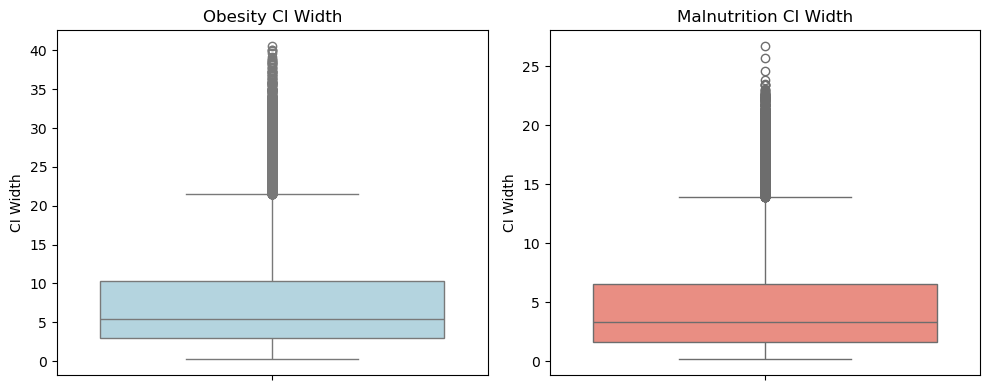

In [806]:
##### Checking the distribution of CI_Width #####
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Obesity CI_Width boxplot
sns.boxplot(y=df_obesity['CI_Width'], ax=axes[0], color='lightblue')
axes[0].set_title('Obesity CI Width')
axes[0].set_ylabel('CI Width')

# Malnutrition CI_Width boxplot
sns.boxplot(y=df_malnutrition['CI_Width'], ax=axes[1], color='salmon')
axes[1].set_title('Malnutrition CI Width')
axes[1].set_ylabel('CI Width')

plt.tight_layout()
plt.show()

**Observations:**

**Obesity - CI Width:**

Most values fall between 3 and 10, indicating a wide spread in the confidence intervals.

This suggests that obesity estimates may be less precise, with greater variability across regions or subgroups.

Many outliers are present, reflecting inconsistencies or challenges in measurement or data availability.

Malnutrition - CI Width:

Values are mostly concentrated between 3 and 7, forming a narrower distribution.

This implies that malnutrition estimates are generally more precise.

Fewer outliers are observed compared to obesity, suggesting more consistent reporting or measurement in this dataset.

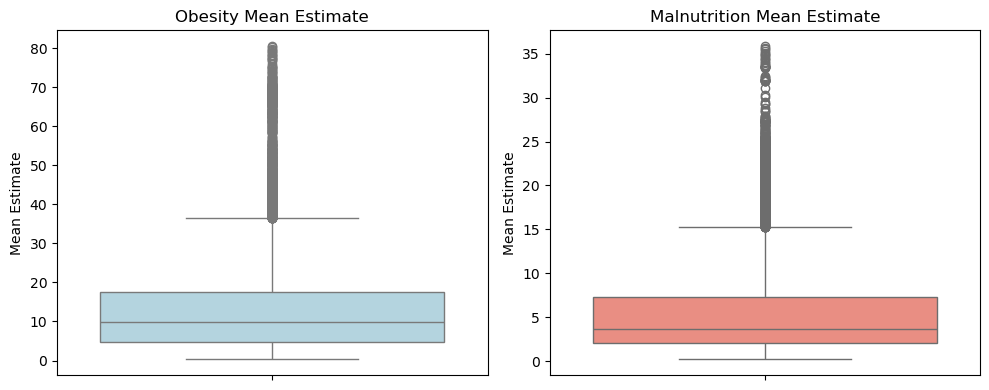

In [804]:
##### Checking the distribution of Mean_Estimate #####
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Obesity CI_Width boxplot
sns.boxplot(y=df_obesity['Mean_Estimate'], ax=axes[0], color='lightblue')
axes[0].set_title('Obesity Mean Estimate')
axes[0].set_ylabel('Mean Estimate')

# Malnutrition CI_Width boxplot
sns.boxplot(y=df_malnutrition['Mean_Estimate'], ax=axes[1], color='salmon')
axes[1].set_title('Malnutrition Mean Estimate')
axes[1].set_ylabel('Mean Estimate')

plt.tight_layout()
plt.show()

**Observations:**

**Obesity - Mean Estimate:**

Most values fall between 5% and 18%, with a median around 10%.

The maximum value reaches 80%, indicating a wide spread and presence of outliers.

This high percentage in some regions may reflect true public health trends, so outliers should not be removed blindly. Instead, it's advisable to retain them for further investigation.

**Malnutrition - Mean Estimate:**

The majority of values lie between 3% and 8%, with a median close to 3%.

The maximum is about 35%, but overall, malnutrition levels remain relatively low in most observations.

The distribution suggests a more concentrated range with fewer extreme values compared to obesity data.

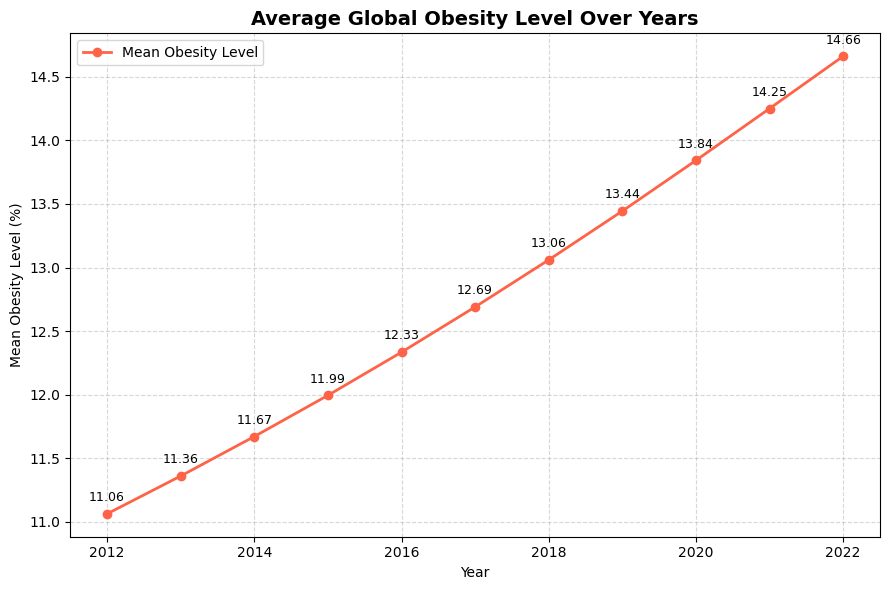

In [865]:
### Analysing yearly trend for Obesity ####

plt.figure(figsize=(9, 6))
# Group by Year and calculate the mean obesity level
yearly_trend = df_obesity.groupby('Year')['Mean_Estimate'].mean().reset_index()
plt.plot(yearly_trend['Year'], yearly_trend['Mean_Estimate'],marker='o', color='tomato', linewidth=2, label='Mean Obesity Level')

## Adding the values to the obtained plot ###
for x, y in zip(yearly_trend['Year'], yearly_trend['Mean_Estimate']):
    plt.text(x, y + 0.1, f'{y:.2f}', ha='center', fontsize=9, color='black')
plt.title('Average Global Obesity Level Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean Obesity Level (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Observation:**

1.There is a consistent increasing trend in global obesity levels over the years.

2.This indicates that obesity rates are rising year-on-year, highlighting a growing public health concern across many regions.

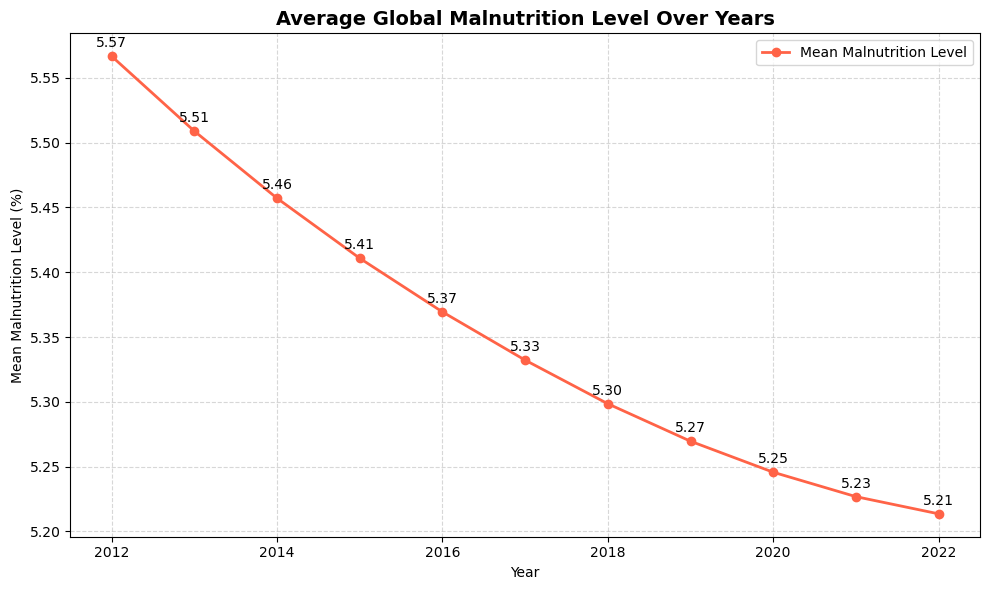

In [957]:
### Analysing yearly trend for Malnutrition ####

plt.figure(figsize=(10, 6))
# Group by Year and calculate the mean malnutrition level
yearly_trend = df_malnutrition.groupby('Year')['Mean_Estimate'].mean().reset_index()
plt.plot(yearly_trend['Year'], yearly_trend['Mean_Estimate'],marker='o', color='tomato', linewidth=2, label='Mean Malnutrition Level')

## Adding the values to the obtained plot ###
for x, y in zip(yearly_trend['Year'], yearly_trend['Mean_Estimate']):
    plt.text(x, y+0.007, f'{y:.2f}', ha='center', fontsize=10, color='black')
plt.title('Average Global Malnutrition Level Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean Malnutrition Level (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Observations:**

1.The Mean Malnutrition Level (%) has gradually declined over the years.

2.In 2012, the global average was around 5.56%, and by 2022, it dropped to 5.21%.

3.This consistent decrease suggests improvements in nutritional access.

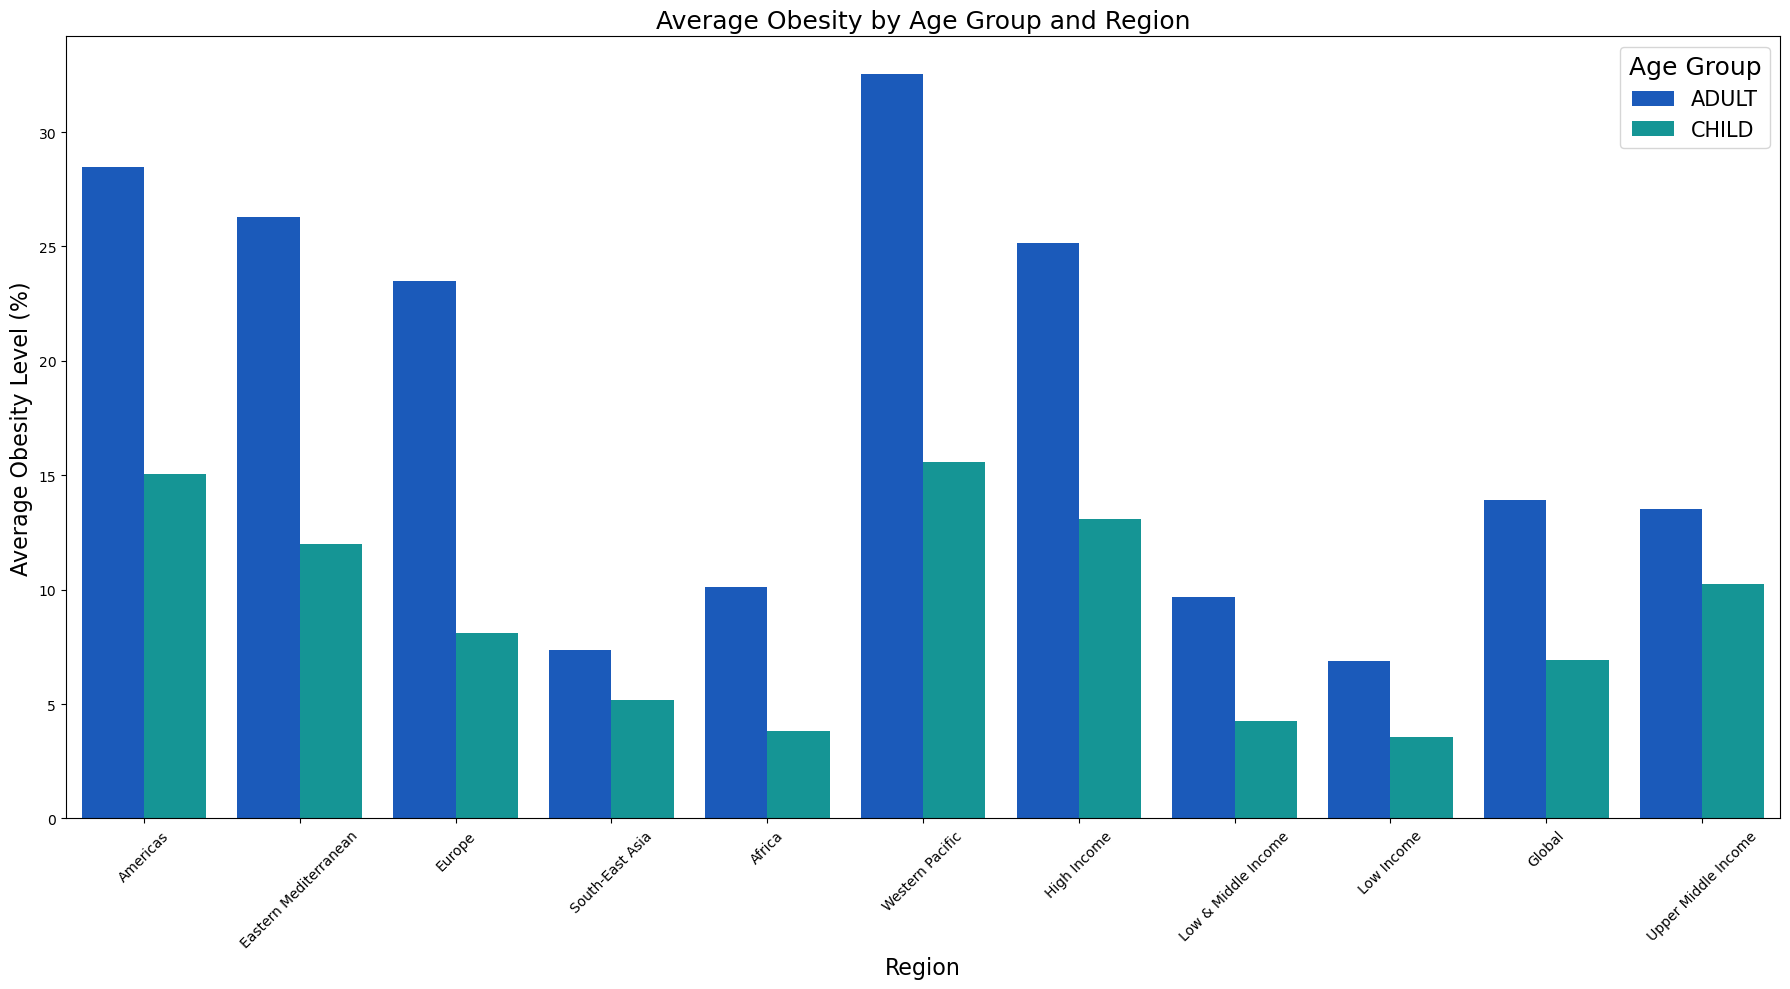

In [1107]:
plt.figure(figsize=(18,10))

### Bar plot to compare Adult Child Obesity ###
sns.barplot(data=df_obesity,x='Region',y='Mean_Estimate',hue='AgeGroup',palette='winter',ci=None)
# Title and labels
plt.title('Average Obesity by Age Group and Region', fontsize=18)
plt.ylabel('Average Obesity Level (%)',fontsize=16)
plt.xlabel('Region',fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Age Group', loc='upper right', frameon=True,fontsize=15,title_fontsize=18)
plt.tight_layout()
plt.show()

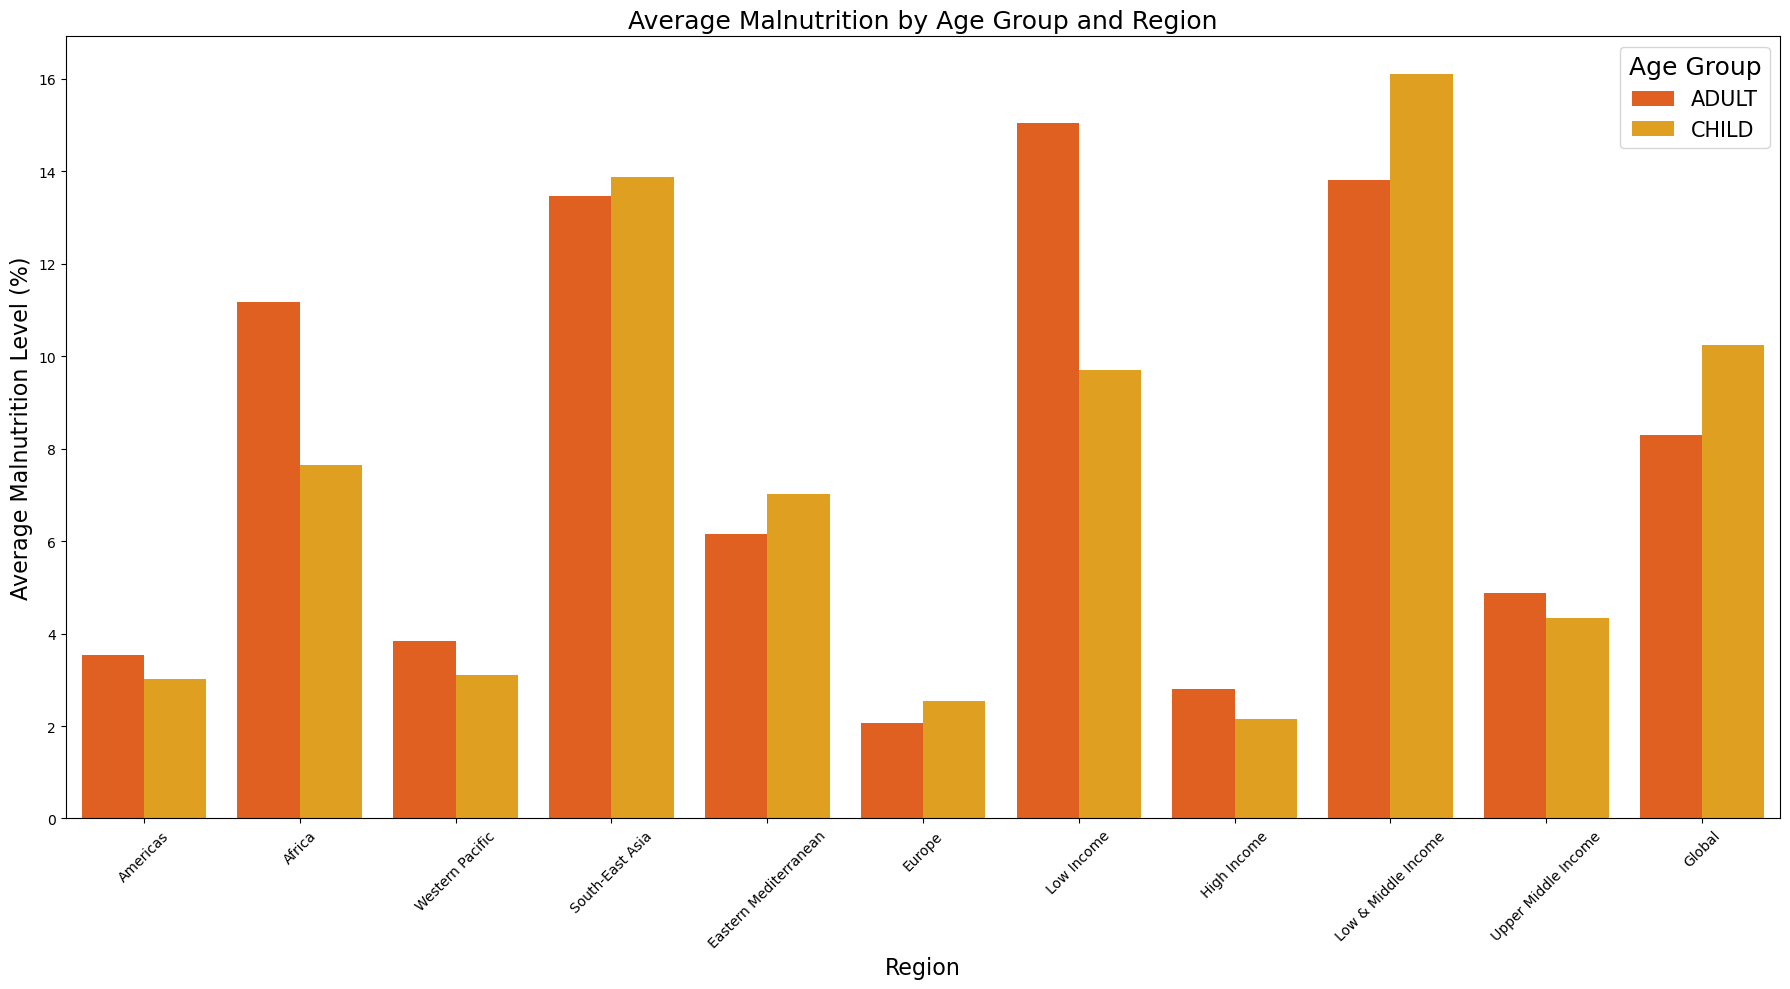

In [1109]:
plt.figure(figsize=(18,10))

### Bar plot to compare Adult Child Obesity ###
sns.barplot(data=df_malnutrition,x='Region',y='Mean_Estimate',hue='AgeGroup',palette='autumn',ci=None)
# Title and labels
plt.title('Average Malnutrition by Age Group and Region', fontsize=18)
plt.ylabel('Average Malnutrition Level (%)',fontsize=16)
plt.xlabel('Region',fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Age Group', loc='upper right', frameon=True,fontsize=15,title_fontsize=18)
plt.tight_layout()
plt.show()

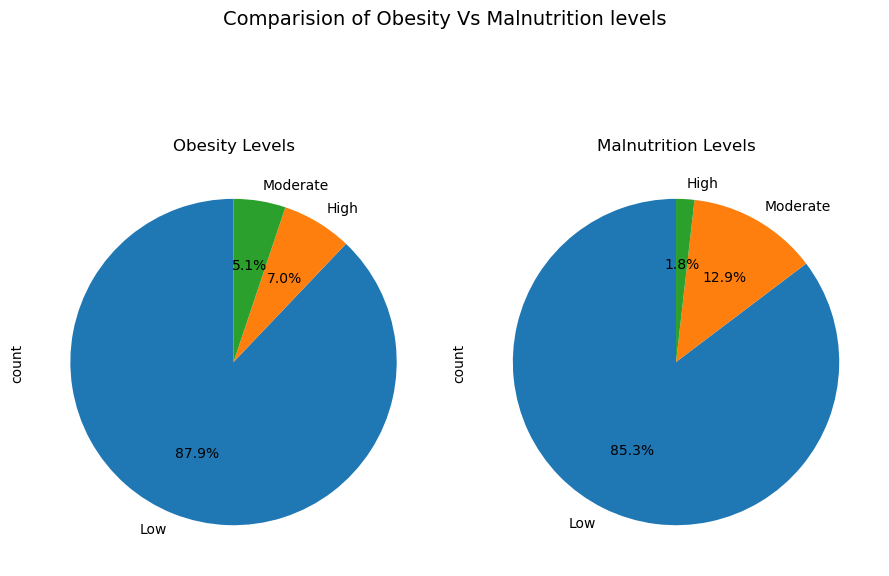

In [986]:
## Comparing the Obesity and Malnutrition levels using pie chart ###
# Creating figure and axes
fig, axes = plt.subplots(1, 2, figsize=(9, 7))
fig.suptitle('Comparision of Obesity Vs Malnutrition levels', fontsize=14)

# Obesity pie chart
df_obesity['obesity_level'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, title='Obesity Levels')

# Malnutrition pie chart
df_malnutrition['malnutrition_level'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, title='Malnutrition Levels')
plt.tight_layout()
plt.show()

In [ ]:
 ####  Separating the numerical and categorical columns for further analysis ###
num_features_obs = [feature for feature in df_obesity.columns if df_obesity[feature].dtype != 'O']
num_features_mal = [feature for feature in df_malnutrition.columns if df_malnutrition[feature].dtype != 'O']
cat_features_obs = [feature for feature in df_obesity.columns if df_obesity[feature].dtype == 'O']
cat_features_mal = [feature for feature in df_malnutrition.columns if df_malnutrition[feature].dtype == 'O'

In [988]:
print(num_features_obs)

['Year', 'Mean_Estimate', 'LowerBound', 'UpperBound', 'CI_Width']


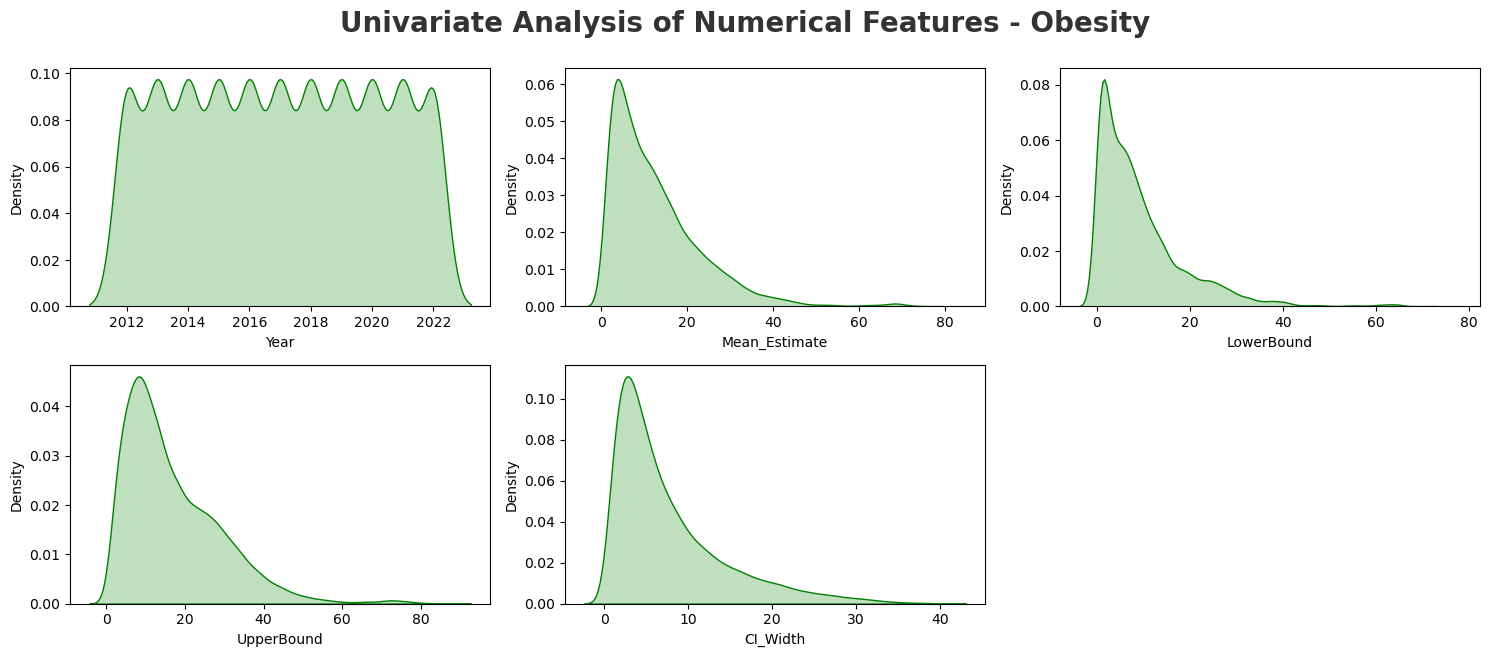

In [653]:
### Analysing the numerical features of Obesity####

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features - Obesity', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_features_obs)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_obesity[num_features_obs[i]],shade=True, color='g')
    plt.xlabel(num_features_obs[i])
    plt.tight_layout()

**Observations:**

**Year:**

The distribution appears relatively stable and uniform, indicating that data collection has occurred consistently across years without major gaps.

**Mean Estimate:**

The distribution is right-skewed, with most values below 10%, suggesting that obesity levels are generally low in the majority of countries.

A few higher values contribute to the skew, likely representing outlier regions with higher obesity rates.

**Lower Bound:**

Also skewed toward the lower end, with many values close to zero.

This indicates that the lower confidence limit for obesity is often very low, suggesting either high variability or low prevalence in many observations.

**Upper Bound:**

The upper bound is more widely spread, with a long tail toward higher values.

This reflects variation across countries, where some have much higher potential obesity rates within the confidence interval.

**CI Width:**

While most CI Width values are low, indicating precise estimates, the presence of some wider intervals suggests greater uncertainty in specific cases or regions.

This mix shows that data quality and precision vary across the dataset.

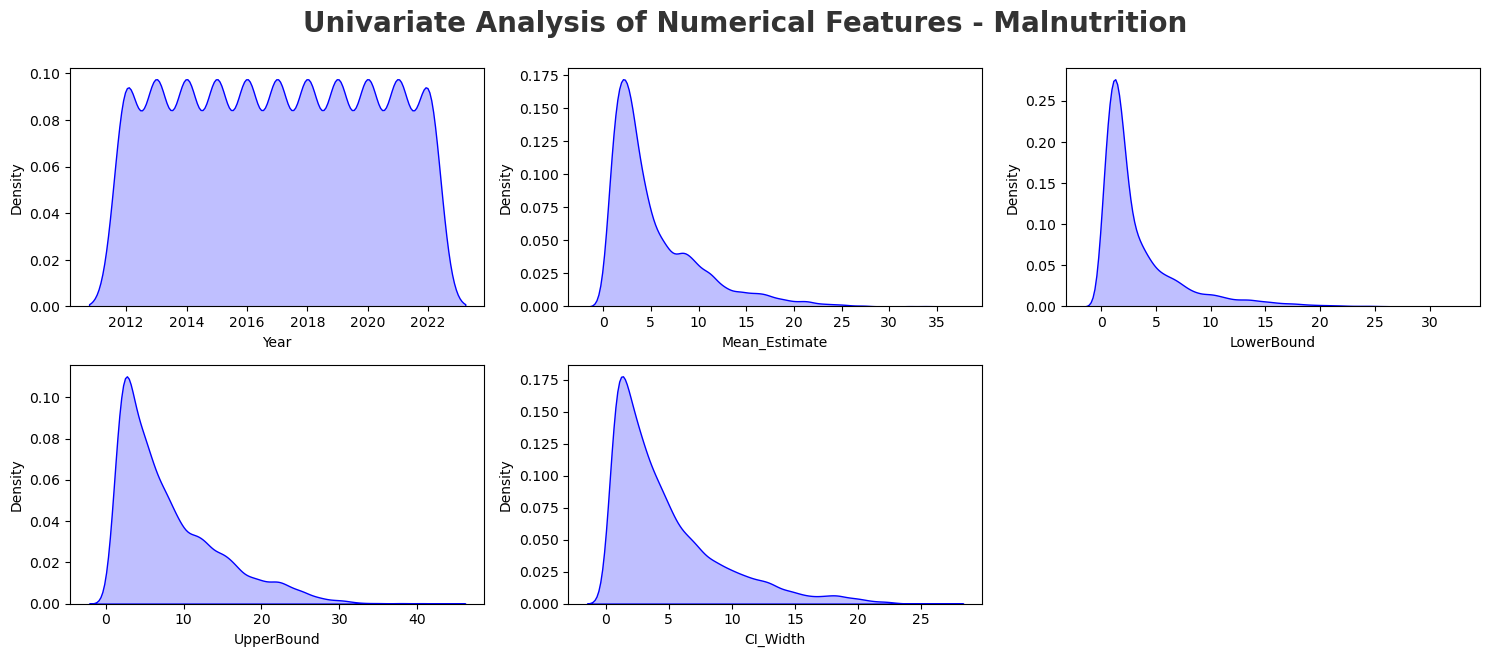

In [994]:
### Analysing the numerical features of Malnutrition####

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features - Malnutrition', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_features_mal)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_malnutrition[num_features_obs[i]],shade=True, color='b')
    plt.xlabel(num_features_obs[i])
    plt.tight_layout()

**Observations:**

**Year:**

The distribution is almost uniform, indicating data is consistently recorded over the years.

**Mean_Estimate:**

The curve is right-skewed, showing most malnutrition values are low (0–6%).

A small number of records exceed 20%, suggesting some regions have severe malnutrition.

**LowerBound:**

Highly concentrated near 0–3%, confirming that lower bounds of malnutrition are consistently low.

The long tail shows that some uncertainty spans higher values, but it's rare.

**UpperBound:**

Right-skewed with the bulk under 10%.

The long tail (up to ~40%) implies that while typical values are low, upper uncertainty in some entries can be high.

**CI_Width (Confidence Interval Width):**

Most values fall below 6, indicating precise estimates in most cases.

A few entries with wider intervals (above 20) suggest greater variability or less reliable data in specific regions or years.

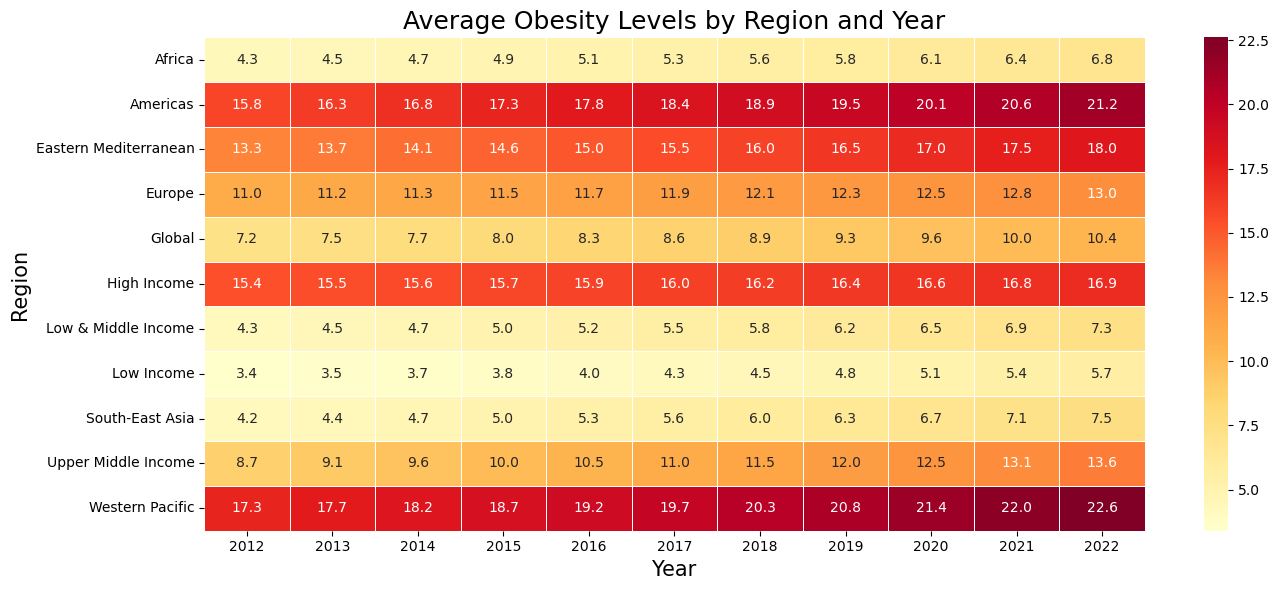

In [1028]:
### Heat Map showing Obesity percentage across regions ###

pivot = df_obesity.groupby(['Region', 'Year'])['Mean_Estimate'].mean().reset_index()
pivot_table = pivot.pivot(index='Region', columns='Year', values='Mean_Estimate')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("Average Obesity Levels by Region and Year",fontsize=18)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Region",fontsize=15)
plt.tight_layout()
plt.show()

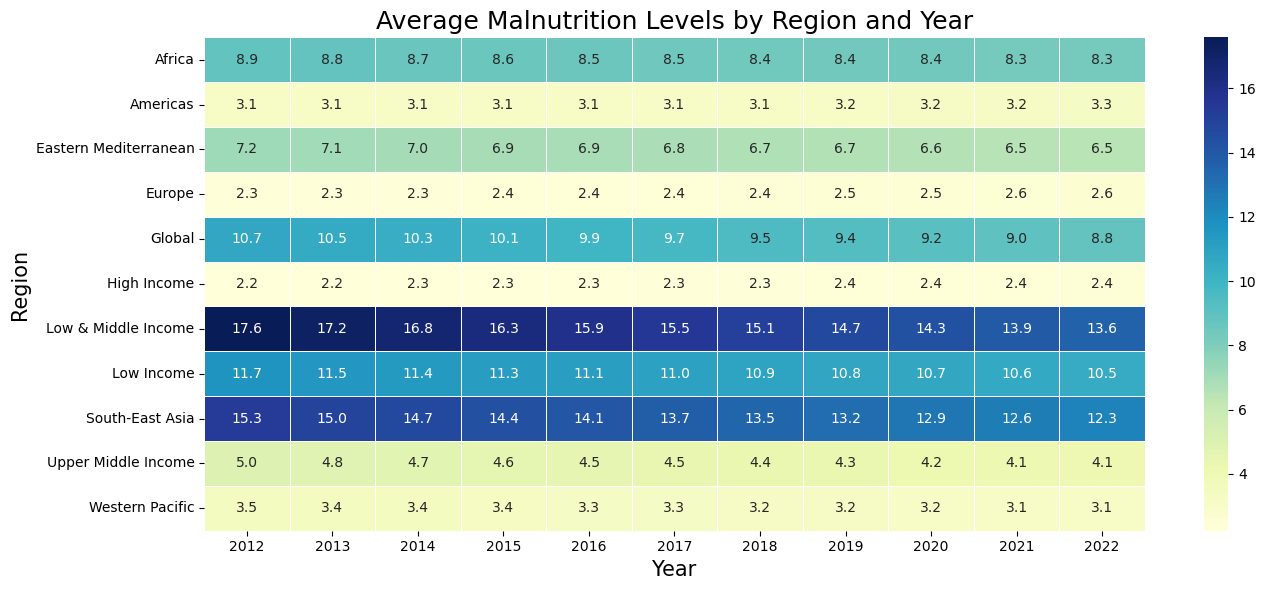

In [1038]:
# Heat Map showing Malnutrition percentage across regions ####

pivot = df_malnutrition.groupby(['Region', 'Year'])['Mean_Estimate'].mean().reset_index()
pivot_table = pivot.pivot(index='Region', columns='Year', values='Mean_Estimate')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Malnutrition Levels by Region and Year",fontsize=18)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Region",fontsize=15)
plt.tight_layout()
plt.show()

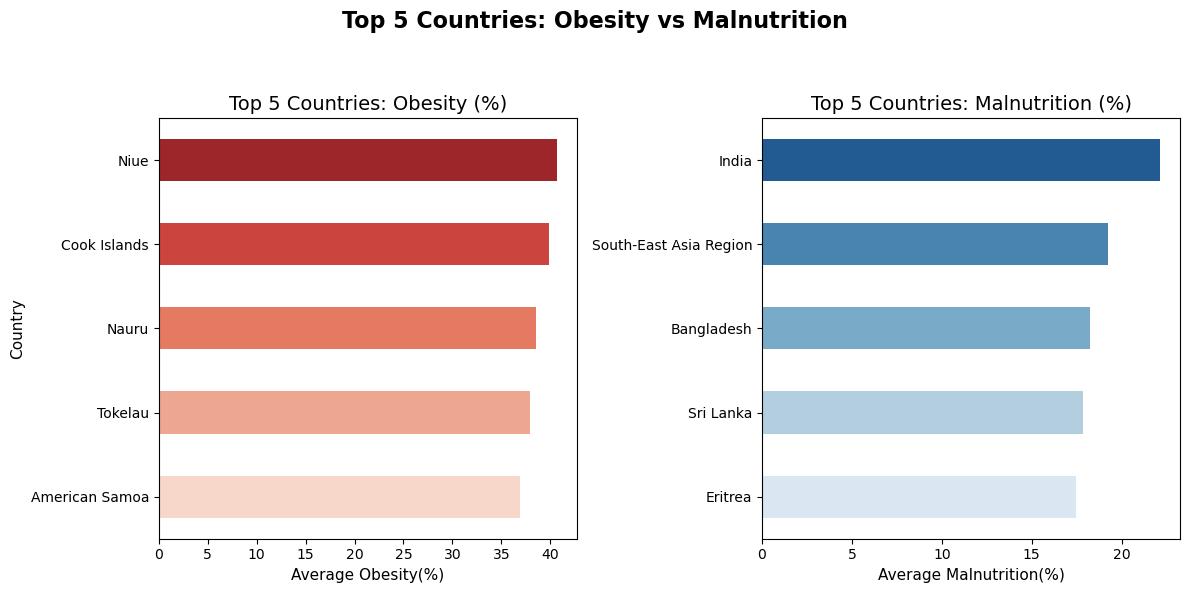

In [1089]:
#### Top 5 Countries by Average Obesity ###
top5_obs = df_obesity.groupby('Country')['Mean_Estimate'].mean().reset_index()
top5_obs = top5_obesity.sort_values(by='Mean_Estimate', ascending=False).head(5)

### Top 5 Countries by Average Malnutrition ###
top5_mal = df_malnutrition.groupby('Country')['Mean_Estimate'].mean().reset_index()
top5_mal = top5_mal.sort_values(by='Mean_Estimate', ascending=False).head(5)

### Creating Subplots ###
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Obesity subplot
sns.barplot(data=top5_obesity, x='Mean_Estimate', y='Country', palette='Reds_r', ax=axes[0],width=0.5)
axes[0].set_title('Top 5 Countries: Obesity (%)', fontsize=14)
axes[0].set_xlabel('Average Obesity(%)',fontsize=11)
axes[0].set_ylabel('Country',fontsize=11)

# Malnutrition subplot
sns.barplot(data=top5_malnutrition, x='Mean_Estimate', y='Country', palette='Blues_r', ax=axes[1],width=0.5)
axes[1].set_title('Top 5 Countries: Malnutrition (%)', fontsize=14)
axes[1].set_xlabel('Average Malnutrition(%)',fontsize=11)
axes[1].set_ylabel('')

# Layout adjustment
plt.suptitle('Top 5 Countries: Obesity vs Malnutrition', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()


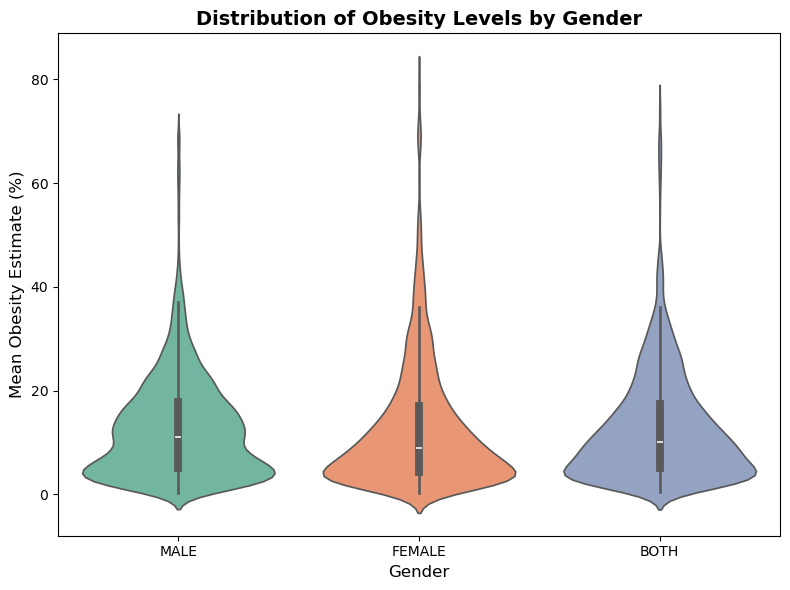

In [1129]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_obesity, x='Gender', y='Mean_Estimate',palette='Set2')
plt.title('Distribution of Obesity Levels by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Obesity Estimate (%)', fontsize=12)
plt.tight_layout()
plt.show()

**Observations:**

**Male:**

The obesity percentage is mostly concentrated between 0% and 20%.

The distribution is relatively compact, suggesting less variability in obesity levels among males.

The maximum observed value is around 75%, indicating a few high outliers.

**Female:**

Obesity levels show a broader spread, indicating greater variability across different populations.

A significant number of entries exceed 30%, with the maximum value reaching around 80%.

This implies that females may have higher obesity rates in certain regions or groups.

**Both (Combined):**

The pattern is similar to the female distribution, with a broad spread and peak around 75%.

This suggests that when both genders are averaged, the female values may pull the distribution wider.

**STEP4 --> Inserting the cleaned and analysed data into Database**

In [641]:
### Pushing data to DB ###
### Establising connection with MY SQL DB ###

myconnection = pymysql.connect(
                host = "127.0.0.1",
                user="root",
                passwd="Aadhu#1207")

cursor_N = myconnection.cursor()

## Creating a new Database ##
cursor_N.execute("CREATE DATABASE IF NOT EXISTS Nutrition")

myconnection = pymysql.connect(
                host = "127.0.0.1",
                user="root",
                passwd="Aadhu#1207",
                database = "Nutrition")

cursor_N = myconnection.cursor()

## Creating Obesity and Malnutrition Table ##

cursor_N.execute("""create table if not exists obesity(
                    year int,
                    gender varchar(10),
                    mean_estimate float,
                    lower_bound float,
                    upper_bound float,
                    age_group varchar(10),
                    country varchar(50),
                    region varchar(50),
                    ci_width float,
                    obesity_level varchar(10))""")

cursor_N.execute("""create table if not exists malnutrition(
                    year int,
                    gender varchar(10),
                    mean_estimate float,
                    lower_bound float,
                    upper_bound float,
                    age_group varchar(10),
                    country varchar(50),
                    region varchar(50),
                    ci_width float,
                    malnutrition_level varchar(10))""")

#### Preparing the Insert statement for obesity table ####
sql = "INSERT INTO obesity (year,gender,mean_estimate,lower_bound,upper_bound,age_group,country,region,ci_width,obesity_level) VALUES (%s, %s, %s,%s,%s, %s, %s,%s,%s,%s)"

# Build list of tuples from DataFrame using iterrows()
obs_data_tuples = []
for index, row in df_obesity.iterrows():
    obs_data_tuples.append((row['Year'], row['Gender'], row['Mean_Estimate'],row['LowerBound'], row['UpperBound'], row['AgeGroup'],row['Country'],row['Region'],row['CI_Width'],row['obesity_level']))

# Using executemany() for bulk insertion
try:
    cursor_N.executemany(sql, obs_data_tuples)
    myconnection.commit()
    print(f"{cursor_N.rowcount} rows inserted successfully.")
except Exception as e:
    print("Error during insert:", e)
    myconnection.rollback()

#### Preparing the Insert statement for malnutrition table ####
sql = "INSERT INTO malnutrition (year,gender,mean_estimate,lower_bound,upper_bound,age_group,country,region,ci_width,malnutrition_level) VALUES (%s, %s, %s,%s,%s, %s, %s,%s,%s,%s)"

# Build list of tuples from DataFrame using iterrows()
mal_data_tuples = []
for index, row in df_malnutrition.iterrows():
    mal_data_tuples.append((row['Year'], row['Gender'], row['Mean_Estimate'],row['LowerBound'], row['UpperBound'], row['AgeGroup'],row['Country'],row['Region'],row['CI_Width'],row['malnutrition_level']))

# Using executemany() for bulk insertion
try:
    cursor_N.executemany(sql, mal_data_tuples)
    myconnection.commit()
    print(f"{cursor_N.rowcount} rows inserted successfully.")
except Exception as e:
    print("Error during insert:", e)
    myconnection.rollback()

# Close connection
cursor_N.close()
myconnection.close()

27720 rows inserted successfully.
27720 rows inserted successfully.
